In [1]:
import os
import sys
import inspect

# insert root dir into sys
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
root_dir = os.path.dirname(currentdir)
# print(root_dir)

if root_dir not in sys.path:
     sys.path.insert(0, root_dir)


In [2]:
import stoch_proc as sp

### Independent Increments

Defined as $X_{n}$ such as:<br>
1) $E(X_{j}(X_{k}-X_{j}))=0$ for all j<k
<br>2) $E(X_{k})=0$
<br><br>which lead to following props:
<br>1)$\rho_{j k}=\rho_{j v}*\rho_{v k}$ hence is markovian
<br>2)$Var(X_{k}) = \sigma(\xi)^2 t_{k} = t_{k}$
<br> This process is important for the stochastic control problem and Ito calcus
REF:example (a) of the Feller. vol 2 ch3 subch 8

In [6]:
# in python3.8 should work:
sp.test_gen_seq(sp.IndIncProcess(N=983, size=1), show=True)


### Stochastic Differential equation:

The simple example where the above process will be used is defined as:
(REF: example (3.7) of the Афанасьев, Колмановский. vol 2 ch2 subch 3)

$\frac{dx}{dt} = y$
<br>$\frac{dy}{dt} = -w^2 x-2\alpha w y + w^2 \sqrt(q) \frac{d\xi}{dt}$
  

where $\xi$ is a process with independent increments so $d\xi$ id normal jumps with $E(d\xi)=0$ and $\sigma(d\xi)^2 = 1$

In [ ]:
# in python3.8 should work:
sp.test_diff(show=True)


### Sum of Markovian Sums


Is not a markovian (REF:  example (b) of the Feller. vol 1 ch15 subch 13)

In [ ]:
# in python3.8 should work:
sp.test_gen_seq(sp.SumOfSumProcess(N=983, size=1), show=True)

### Stationary normal markovian

Defined as:
<br>If $Z_{k}$ is a Normal process such that$E(Z_{k})=0$ and $E(Z_{k}^{2})=1$
<br>then the seq of $X_{k}$:

<br>$X_{1}=\lambda_{1} Z_{1}$
<br>$X_{k}=a_{k}X_{k-1}+\lambda_{k}Z_{k}$

<br>will be stationary markovian normal dist:

since:
$ E(X_{j}, X_{k}) = E(X_{j}(a_{k}X_{k-1}+\lambda_{k}Z_{k}))=$
$a_{k}E(X_{j}X_{k-1})+\lambda_{k}E(X_{j}Z_{k})$

since $E(X_{j}Z_{k}) = 0$ ($Z_{k}$ is independent of $(X_{1},...X_{k-1})$)
then

$a_{k}=\frac{E(X_{j}X_{k})}{E(X_{j}X_{k-1})}$=(since $X_{k}$ is stationary) = 
$\frac{\sigma^{2}\rho^{k-j}}{\sigma^{2}\rho^{j-(k-1)}}$=(since markovian)=$\rho_{k-1,k}$=(since stationary)= $\rho$

<br>(REF: example (c) of the Feller. vol 2 ch3 subch 8)

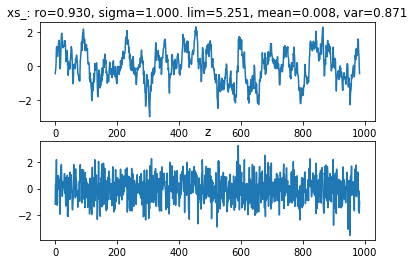

In [7]:
sp.test_gen_seq(sp.SNMProcess(N=983, ro=0.93, sigma=1, size=1), show=True)

decreasing ro will change the process to look like a independent seq:

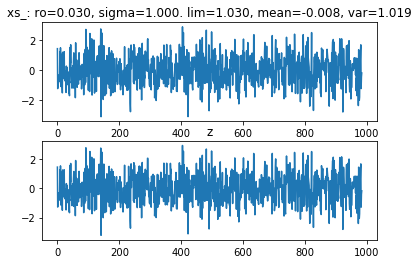

In [8]:
sp.test_gen_seq(sp.SNMProcess(N=983, ro=0.03, sigma=1, size=1), show=True)

$E(X^{2}_{k}) = \sigma^{2}$ is independent on k because of stationarity $(P(X_{1+\alpha},\ldots, X_{r+\alpha}) = P(X_{1},\ldots, X_{r})$)


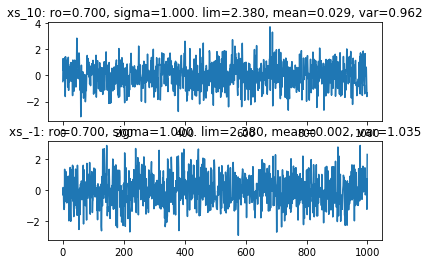

In [5]:
sp.test_X_Nth(
    sp.SNMProcess(N=100, count=1000, ro=0.7, sigma=1, size=1),
    idxs=[10, -1], show=True)

So for $X_{10}$ and $X_{100}$ the resulting variance is same